### Session 1: Introduction to Statistical Machine Learning
### Introduction to Descriptive Statistics

### Import Libraries and Load Dataset


#### Numpy
The `numpy` is the efficient numerical computation library of Python.

#### Pandas 
Python for Data Analysis (`pandas`) is a powerful library that allows using the Data Frame structure. This library simplifies statistical analysis by providing the DataFrame as a coherent strucutre with some preliminary statistical fitting and visualization tools. However for very large data sets, we recommend using `numpy`. Most of `pandas` functionalities can be re-produced more efficiently with `scipy`, `sklearn`, and `numpy` libraries. `pandas` is only more convenient and saves more coding time.


#### Matplotlib
Matlab plot library for Python (`matplotlib`) is the general visualization tool. Many Python visualizations rely on matplotlib. Matplotlib works with `numpy` arrays, and also with `pandas` data frames. 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load Data

In [2]:
wine = pd.read_csv('data/session1.csv')

In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
Unnamed: 0     150930 non-null int64
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [4]:
wine = wine[['country', 'points', 'price', 'province', 'variety']]

In [5]:
wine.head(2)

,country,points,price,province,variety
0,US,96,235.0,California,Cabernet Sauvignon
1,Spain,96,110.0,Northern Spain,Tinta de Toro


In [6]:
wine.describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


In [7]:
wine_complete_cases = wine.dropna()

In [8]:
wine_complete_cases.describe()

,points,price
count,137230.000000,137230.000000
mean,87.788035,33.132019
std,3.221572,36.323072
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


### Descriptive Statistics

### Mean

In [9]:
prices_wrong = wine['price']

print(sum(prices_wrong))


prices_right = wine_complete_cases['price']

sum(prices_right)


nan


4546707.0

In [10]:
# Extract all of the points given to the wines from the data set
scores = wine_complete_cases['points']

In [11]:
# Sum up all of the scores 
sum_score = sum(scores)

# Get the number of observations
num_score = len(scores)

# Now calculate the average
avg_score = sum_score/num_score

In [12]:
print("The average score is:", avg_score)

The average score is: 87.78803468629309


The average score in the wine data set tells us that the "typical" score in the data set is around $87.78\%$. This tells us that most wines in the data set are highly rated, assuming that a scale of 0 to 100.

In [13]:
np.mean(scores)

87.78803468629309

In [14]:
np.sum(prices_wrong)

4546799.0

### Exercise : Compute the average wine price on this dataset

In [15]:
# Extract all of the prices given to the wines from the data set
prices = wine_complete_cases['price']
np.mean(prices)

33.132019237776

The average price is $\$33.13$.

### Median

In [16]:
# Find the number of wine prices 
num_wines = len(prices)
num_wines

137230

The sample size is an even number.

In [17]:
# We'll sort the wine prices into ascending order
sorted_prices = sorted(prices)

In [18]:
# We'll calculate the middle indexes 
middle1 = int(num_wines / 2)
middle2 = middle1 - 1

In [19]:
# Now we can compute the median
median_price = (sorted_prices[middle1] + sorted_prices[middle2])/2

In [20]:
print("The median price is:", median_price)

The median price is: 24.0


The median price of a wine bottle in the data set is $\$24.00$. This finding suggests that at least half of the wines in the data set are sold for $\$24.00$ or less.

In [21]:
np.median(prices)

24.0

An average price of $\$33.13$ is certainly far off from our median price, so what happened here? The difference between mean and median is due to robustness.

In [22]:
min_price = min(prices)
max_price = max(prices)
print("The minimum price is", min_price, "and the maximum is", max_price)

The minimum price is 4.0 and the maximum is 2300.0


In [23]:
price_range = max_price - min_price
print("The price range is", price_range)

The price range is 2296.0


In [24]:
price_mode = prices.mode()
print("The most common price is", np.array(price_mode[0]))

The most common price is 20.0


### Frequency Table

In [25]:
(prices.value_counts()/len(prices)).head(1)

20.0    0.057276
Name: price, dtype: float64

In [26]:
countries = wine_complete_cases['country']
countries.value_counts().head(5)

US        62139
Italy     18784
France    14785
Spain      8160
Chile      5766
Name: country, dtype: int64

In [27]:
(countries.value_counts()/len(countries)).head(5)

US        0.452809
Italy     0.136880
France    0.107739
Spain     0.059462
Chile     0.042017
Name: country, dtype: float64

### Standard Deviation

In [28]:
def stdev(nums):
    diffs = 0
    avg = sum(nums)/len(nums)
    for n in nums:
        diffs += (n - avg)**(2)
    return (diffs/(len(nums)))**(0.5)

In [29]:
print("The standard deviation of prices is ", \
      stdev(prices))

The standard deviation of prices is  36.32293953967518


In [30]:
np.std(prices)

36.32293953967593

### Visualization with `matplotlib`

#### Histogram

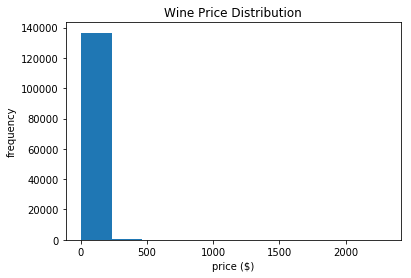

In [31]:
plt.hist(prices)
plt.title('Wine Price Distribution')
plt.xlabel('price ($)')
plt.ylabel('frequency');

In [32]:
?plt.hist

In [33]:
# iloc gives back a selected dataframe using the row and column indices
wine_complete_cases.iloc[(wine_complete_cases.price < 100).values, :].head()

,country,points,price,province,variety
2,US,96,90.0,California,Sauvignon Blanc
3,US,96,65.0,Oregon,Pinot Noir
4,France,95,66.0,Provence,Provence red blend
5,Spain,95,73.0,Northern Spain,Tinta de Toro
6,Spain,95,65.0,Northern Spain,Tinta de Toro


In [34]:
# subset of data with price < 100 for pandas-experienced
wine_less_100 = wine_complete_cases[wine_complete_cases.price < 100]

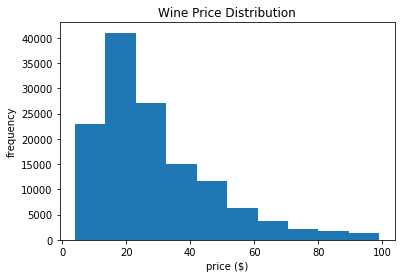

In [35]:
plt.hist(wine_less_100['price'])
plt.title('Wine Price Distribution')
plt.xlabel('price ($)')
plt.ylabel('frequency');

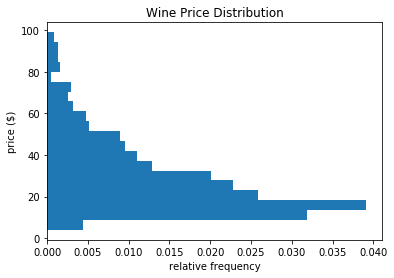

In [36]:
plt.hist(wine_less_100['price'], bins=20, orientation='horizontal', 
         density=True)
plt.title('Wine Price Distribution')
plt.ylabel('price ($)')
plt.xlabel('relative frequency');

#### Boxplot

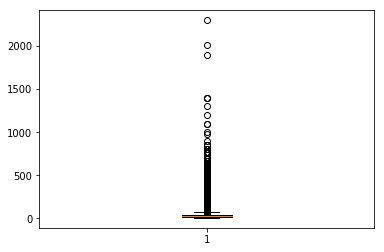

In [37]:
plt.boxplot(prices);

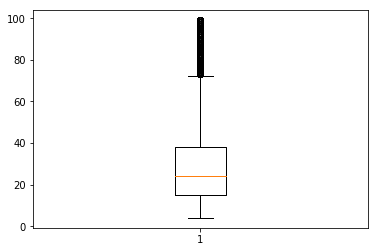

In [38]:
plt.boxplot(wine_less_100['price']);

#### Pie and Bar Charts

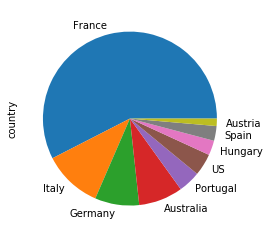

In [39]:
# subset of data with price > 500 for pandas-experienced
wine_more_500 = wine_complete_cases[wine_complete_cases.price > 500]

wine_more_500['country'].value_counts().plot(kind='pie');

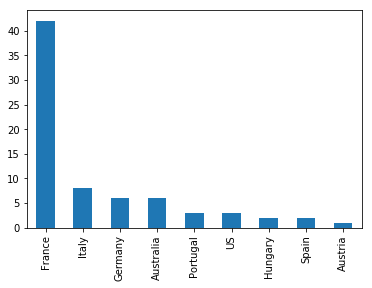

In [40]:
wine_more_500['country'].value_counts().plot(kind='bar');

#### Scatterplot

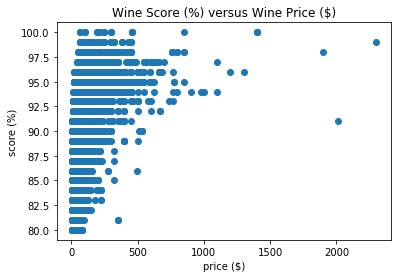

In [41]:
plt.scatter(prices, scores)
plt.title('Wine Score (%) versus Wine Price ($)')
plt.xlabel('price ($)')
plt.ylabel('score (%)');

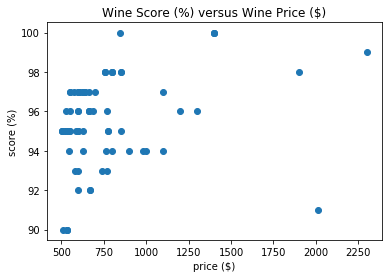

In [42]:
plt.scatter(wine_more_500['price'], wine_more_500['points'])
plt.title('Wine Score (%) versus Wine Price ($)')
plt.xlabel('price ($)')
plt.ylabel('score (%)');

### Visualization with `pandas`

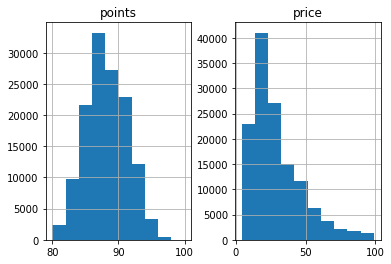

In [43]:
wine_less_100.hist();

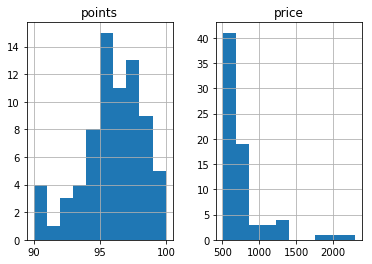

In [44]:
wine_more_500.hist();

In [45]:
wine_us = wine_complete_cases[wine_complete_cases.country == 'US']

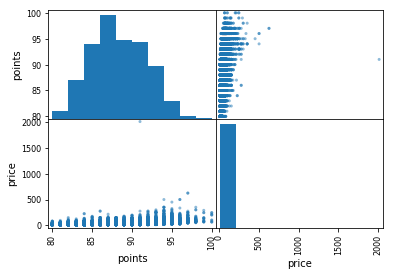

In [46]:
from pandas.plotting import scatter_matrix
scatter_matrix(wine_us);

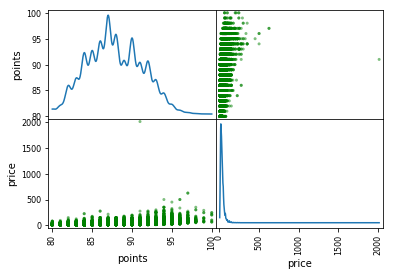

In [47]:
scatter_matrix(wine_us, diagonal = 'kde', c='g');



The following material is partially inspied by the blog post https://www.dataquest.io/blog/basic-statistics-with-python-descriptive-statistics/